# 5.2 The likelihood

The function that we maximised above to find our estimate for the unknown parameter $\pi$ took the same algebraic appearance as the probability distribution function, evaluated at the value of the observed data. We will see below that this function is called the likelihood. The likelihood looks like a probability distribution function. It has a probabilistic interpretation for any particular value of $\pi$: it's the probability of seeing the observed data assuming that is the true value of $\pi$. However, in contrast to the probability distribution function, which is a function of $x$ and sums to 1 over all possible values of $x$, the likelihood function is a function of $\pi$. So, for example, this does not sum to 1 over all possible values of $\pi$. 

A general definition of the likelihood is as follows.

For a probability model with parameter $\theta$, the likelihood of the parameter $\theta$ given the observed data $x$ is defined as

$$
L(\theta | x) = P(x | \theta)
$$

On the right hand side of this equation:

* This is either a probability distribution function or a density function
* If our distribution is discrete, as above, this is: $P(x | \theta) = P(X=x)$
* If our distribution is continuous, this becomes: $P(x | \theta) = f(x)$
* $P(x | \theta)$ is a probability statement. It is the probability of seeing the observed data, under the assumed model, assuming that the true parameter value is equal to $\theta$.

And on the left hand side of this equation:

* $L(\theta | x)$ is the likelihood function, often just called the likelihood. 

In an informal sense the likelihood conveys the *consistency* of different values of the parameter with the observed data.

We often just write the likelihood as $L(\theta)$. The additional notation (writing "$| x$") is merely to remind ourselves that the likelihood function involves the observed data, but it is not a function of these: $x$ is treated as a fixed quantity in the likelihood. 


## 5.2.1 Example: the Binomial model

Consider a diabetes clinic at which patients present following initial diagnosis. The first line of intervention for diabetes is lifestyle change, and the clinician wants to determine what proportion of patients will respond to this intervention. She decides to conduct a study by following up twenty patients who present to the clinic in one day. 

**Statistical model:** We assume that a binomial model is appropriate for the number of patients who will respond to lifestyle changes out of the twenty patients in total.

$$ X \sim binomial(20, \pi) $$

**Data:** Out of the twenty patients sampled, she found that twelve of them had responded well after six weeks of recommended lifestyle changes. Our observed data are $x = 12$.

**Probability distribution function:** As we described before, the likelihood of $\pi$ given these data is the probability of observing the data for different values for $\pi$. Remember the probability distribution function for a binomial distribution of size 20 is

$$ 
P(X = x|\pi) = {20 \choose x} \pi^{x} (1-\pi)^{20 - x} 
$$

for a given value of $\pi$. 

**Likelihood:** The likelihood has this same form but is viewed as a function of $\pi$, rather than a function of $x$. For our observed data of 12 out of 20 patients,

$$ 
L(\pi | x = 12) = {20 \choose 12} \pi^{20} (1-\pi)^{20 - 12} 
$$

As before, we can identify the value of $\pi$ which gives the maximum likelihood by plotting the likelihood for a range of values of $\pi$.

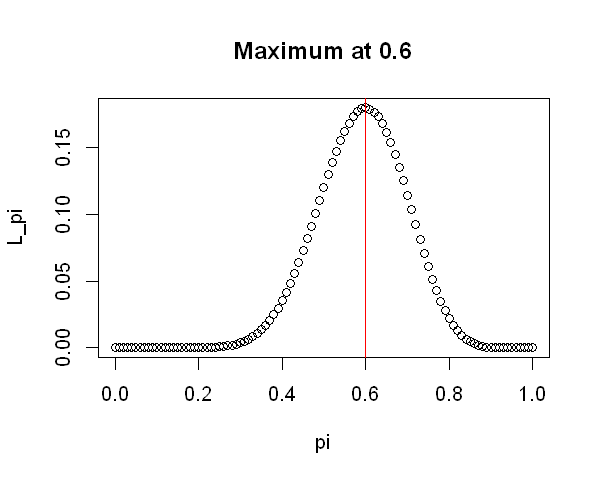

In [1]:
options(repr.plot.width=5, repr.plot.height=4)

# Define a range of values for pi
pi = seq(0,1,by = 0.01)

# Calculate the likelihood for each value, this time given n=20 and x=12
L_pi <- choose(20,12)*pi^12*(1-pi)^(20-12)

# Plot the output
plot(x = pi, y = L_pi)

# Find the value of pi for which L_pi is highest
pi_max <- pi[which.max(L_pi)]

# Add a line to the plot at pi_max
abline(v = pi_max, col = "red")

# Add a title specifying the value of pi_max
title(paste("Maximum at", pi_max))

The value which maximises this function is 0.6, the observed sample proportion; we'll call this value $\hat{\pi}$ to indicate that it is an estimate of $\pi$. Notice that the likelihood for values of $\pi$ smaller than 0.3 or greater than 0.9 is very small - much smaller than that of values around 0.6 - suggesting that these values are inconsistent with the observed data.  



## 5.2.2 Example: the Exponential model

Suppose we wish to estimate how long patients usually wait in reception before their GP appointment. At one practice, a patient walks through the door and the receptionist records the time until they get called through.

**Statistical model:** The waiting time in minutes, $Y$, is a continuous random variable which must be non-negative. It is common to use an exponential distribution to model waiting times, so we will assume it's a reasonable choice for this example.

$$ 
Y \sim Exp(\lambda) 
$$

*Remember that the mean of this distribution is equal to one over the rate parameter $\lambda$, i.e. $E(Y) = \frac{1}{\lambda}$.*

**Data:** The receptionist observes that the patient waits for eight minutes and forty-five seconds, so $y = 8.75$.

**Probability density function:** The PDF for an exponential distribution is

$$
f_Y(y|\lambda) = \lambda e^{-y\lambda}
$$

**Likelihood:** We write down the likelihood for $\lambda$ based on the exponential PDF above.

$$ 
L(\lambda | y = 8.75) = \lambda e^{-8.75\lambda}
$$

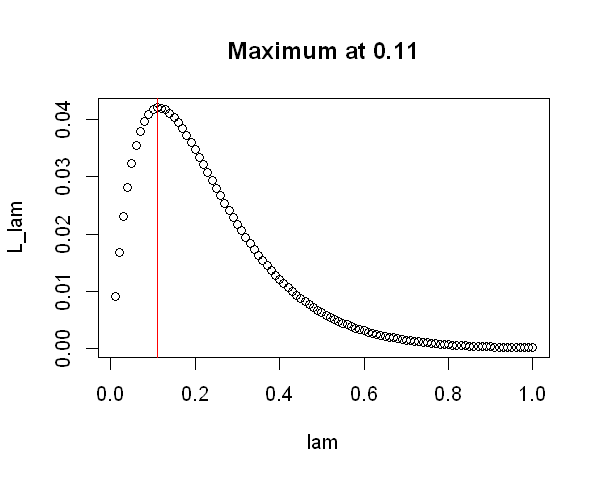

In [2]:
options(repr.plot.width=5, repr.plot.height=4)

# Define a range of values for lambda, equating to mean waiting times from 1 to 100 minutes
lam = seq(0.01,1,by = 0.01)

# Calculate the likelihood for each value, given y=8.75
L_lam <- lam*exp(-8.75*lam)

# Find the value of lambda for which L_lam is highest
lam_max <- lam[which.max(L_lam)]

# Plot the likelihood and indicate the maximum value
plot(x = lam, y = L_lam)
abline(v = lam_max, col = "red")
title(paste("Maximum at", round(lam_max,2)))

If we evaluate over a fine enough range of values for $\lambda$, we find that the value which maximises this exponential likelihood is equal to $\frac{1}{8.75}$, i.e. one over the observed waiting time. This defines an exponential distribution with mean equal to the observed waiting time. 

As with the binomial example, the estimate obtained by maximising the likelihood is intuitively sensible based on the data we've observed.